In [ ]:
Title


Introduction:
  Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
  Clearly state the question you will try to answer with your project
  Identify and describe the dataset that will be used to answer the question


Preliminary exploratory data analysis:
  Demonstrate that the dataset can be read from the web into R 
  Clean and wrangle your data into a tidy format
  Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
  Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


Methods:
  Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
  Describe at least one way that you will visualize the results


Expected outcomes and significance:
  What do you expect to find?
   What impact could such findings have?
  What future questions could this lead to?

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [43]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
zip_file <- tempfile(fileext = ".zip")
download.file(url, zip_file, mode = "wb")
student_data <- read_delim(unz(description = zip_file, filename = "student-mat.csv"), delim = ";")


Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



In [ ]:
write.csv(student_data, "student_data.csv")

In [44]:
student_data_cleaned_binary <- student_data %>%
    mutate(school = recode(school, 
                     "GP" = "0",   # for school, GP value is 0, MS value is 1
                     "MS" = "1"))  %>% 
    mutate(school = as.numeric(school)) %>%
    mutate(sex = recode(sex,
                       "M" = "0",  # for sex, male is 0, female is 1
                       "F" = "1")) %>%
    mutate(sex = as.numeric(sex)) %>%
    mutate(address = recode(address,
                           "U" = "0",   # for address, urban is 0, rural is 1
                           "R" = "1")) %>%
    mutate(address = as.numeric(address)) %>%
    mutate(famsize = recode(famsize,
                           "LE3" = "0",  # for family size, less than or equal to 3 is 0, greater than 3 is 1
                           "GT3" = "1")) %>%
    mutate(famsize = as.numeric(famsize)) %>%
    mutate(Pstatus = recode(Pstatus,
                           "T" = "0",    # for parental cohabitation status, together is 0, apart is 1
                           "A" = "1")) %>%
    mutate(Pstatus = as.numeric(Pstatus)) %>%
    mutate(schoolsup = recode(schoolsup,
                             "no" = "0", # for extra education support at school, no is 0, yes is 1
                             "yes" = "1")) %>%
    mutate(schoolsup = as.numeric(schoolsup)) %>%
    mutate(famsup = recode(famsup,
                          "no" = "0",    # for extra educatino support at home, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(famsup = as.numeric(famsup)) %>%
    mutate(paid = recode(paid,
                          "no" = "0",    # for extra paid educatino support (tutor) , no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(paid = as.numeric(paid)) %>%
    mutate(activities = recode(activities,
                          "no" = "0",    # for extracurricular activities, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(activities= as.numeric(activities)) %>%
    mutate(nursery = recode(nursery,
                          "no" = "0",    # for if they attended nursery school (preschool/kindergarten, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(nursery = as.numeric(nursery)) %>%
    mutate(higher = recode(higher,
                          "no" = "0",    # for if they aspire for higher education, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(higher = as.numeric(higher)) %>%
    mutate(internet = recode(internet,
                          "no" = "0",    # for internet access at home, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(internet = as.numeric(internet)) %>%
    mutate(romantic = recode(romantic,
                          "no" = "0",    # for being in a romantic relationship, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(romantic= as.numeric(romantic)) 

write.csv(student_data_cleaned_binary, "student_data_cleaned.csv")


In [6]:
# Split the data into training and testing set
student_data_split <- initial_split(student_data_cleaned_binary, prop = 0.75, strate = Class)
student_train <- training(student_data_split)
student_test <- testing(student_data_split)

In [15]:
# Student final grade summary
student_train_G3 <- group_by(student_train, G3) %>%
    summarize(n = n())

# Student first period grade summary
student_train_G1 <- group_by(student_train, G1) %>%
    summarize(n = n())

# Student second period grade summary
student_train_G2 <- group_by(student_train, G2) %>%
    summarize(n = n())

# Distribution of mother's education level
student_train_meduc <- group_by(student_train, Medu) %>%
    summarize(n = n())

# Distribution of father's education level
student_train_feduc <- group_by(student_train, Fedu) %>%
    summarize(n = n())
student_train_meduc
student_train_feduc
student_train_G1
student_train_G2
student_train_G3



`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



Medu,n
<dbl>,<int>
0,2
1,45
2,74
3,72
4,104


Fedu,n
<dbl>,<int>
0,1
1,57
2,86
3,77
4,76


G1,n
<dbl>,<int>
3,1
4,1
5,6
6,21
7,25
8,33
9,22
10,37
11,29


G2,n
<dbl>,<int>
0,9
5,13
6,12
7,17
8,22
9,36
10,36
11,29
12,31


G3,n
<dbl>,<int>
0,27
4,1
5,7
6,11
7,7
8,27
9,25
10,38
11,37


ERROR: Error: Can't recycle `..1` (size 17) to match `..2` (size 16).


failures, study time, absences, internet, higher, Medu, Fedu, schoolsup, famsup, paid, famrel, health, (Pstatus)?


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

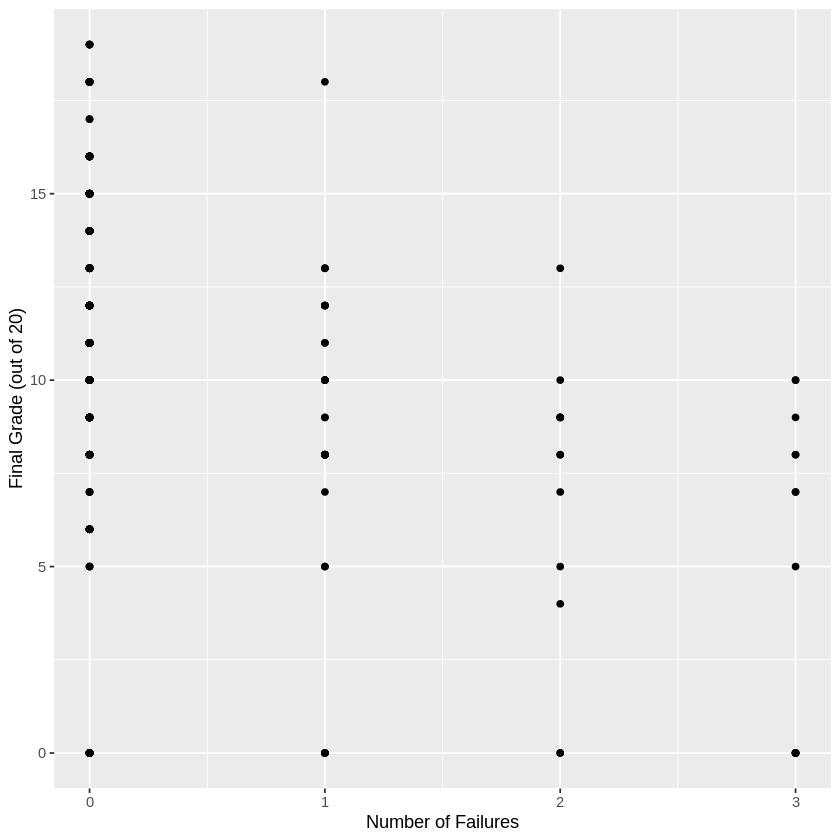

In [18]:
student_plot <- ggplot(student_train, aes(x = failures, y = G3)) +
    geom_point() +
    labs(x = "Number of Failures" , y = "Final Grade (out of 20)")
    theme(text = element_text(size = 20))
student_plot

In [45]:
student_train_group <- student_train %>%
    mutate( ints = cut(G3, c(0, 5, 10, 15, 20), labels =FALSE)) %>%
    group_by(ints)

student_train_group


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,ints
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,1,18,0,1,1,4,4,at_home,teacher,⋯,3,4,1,1,3,6,5,6,6,2
0,1,17,0,1,0,1,1,at_home,other,⋯,3,3,1,1,3,4,5,5,6,2
0,1,15,0,0,0,1,1,at_home,other,⋯,3,2,2,3,3,10,7,8,10,2
0,1,15,0,1,0,4,2,health,services,⋯,2,2,1,1,5,2,15,14,15,3
0,1,16,0,1,0,3,3,other,other,⋯,3,2,1,2,5,4,6,10,10,2
0,0,16,0,0,0,4,3,services,other,⋯,4,2,1,2,5,10,15,15,15,3
0,0,16,0,0,0,2,2,other,other,⋯,4,4,1,1,3,0,12,12,11,3
0,0,15,0,0,1,3,2,services,other,⋯,2,2,1,1,1,0,16,18,19,4
0,0,15,0,1,0,3,4,other,other,⋯,5,1,1,1,5,0,14,15,15,3
